<ipython-input-8-9ea767438e3f>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_df['Order_Year'] = pd.to_datetime(superstore_df['Order_Date']).dt.year


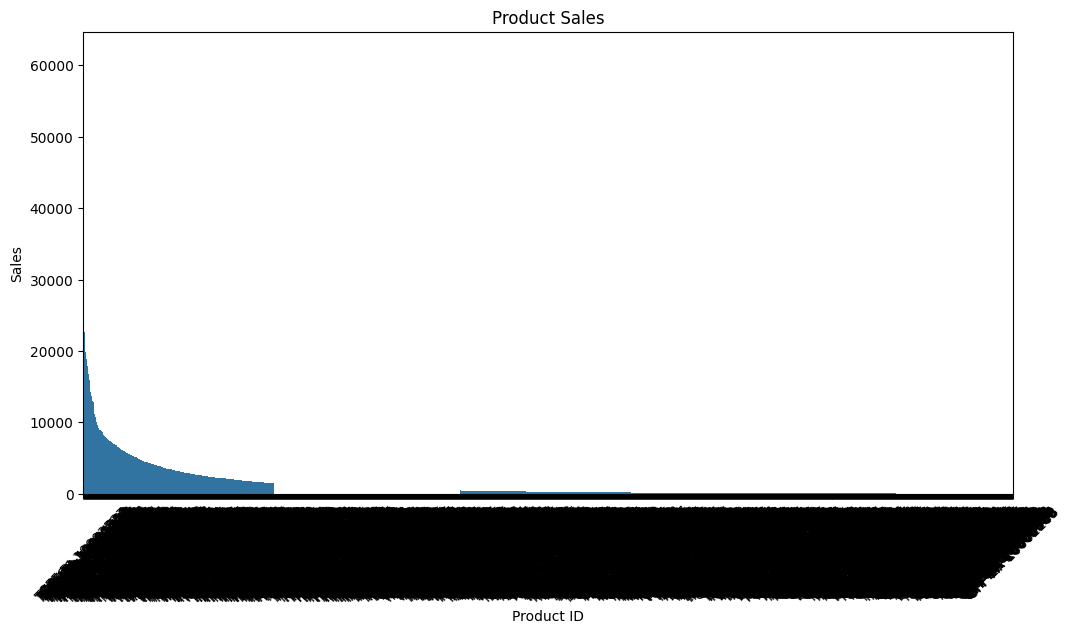

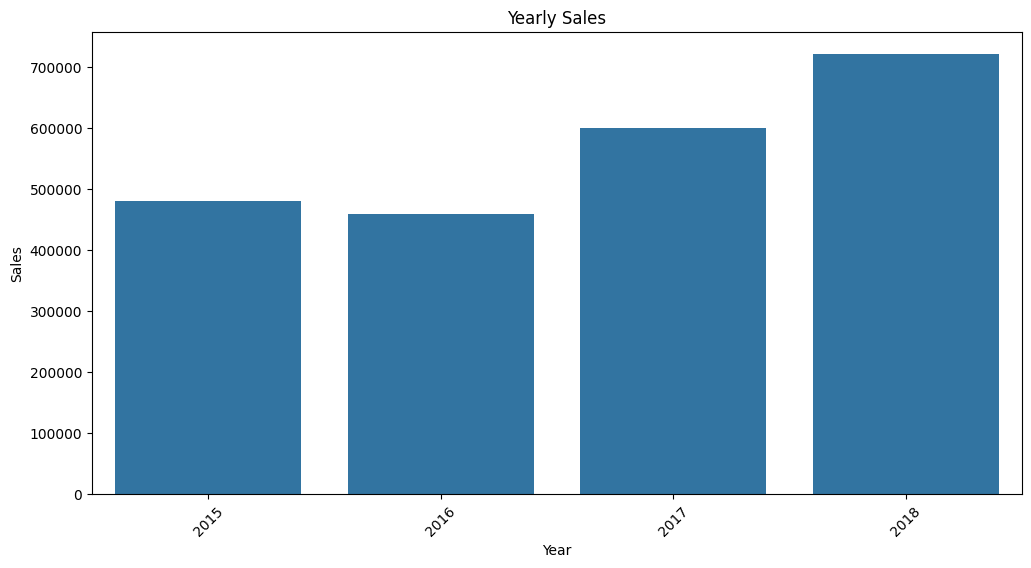

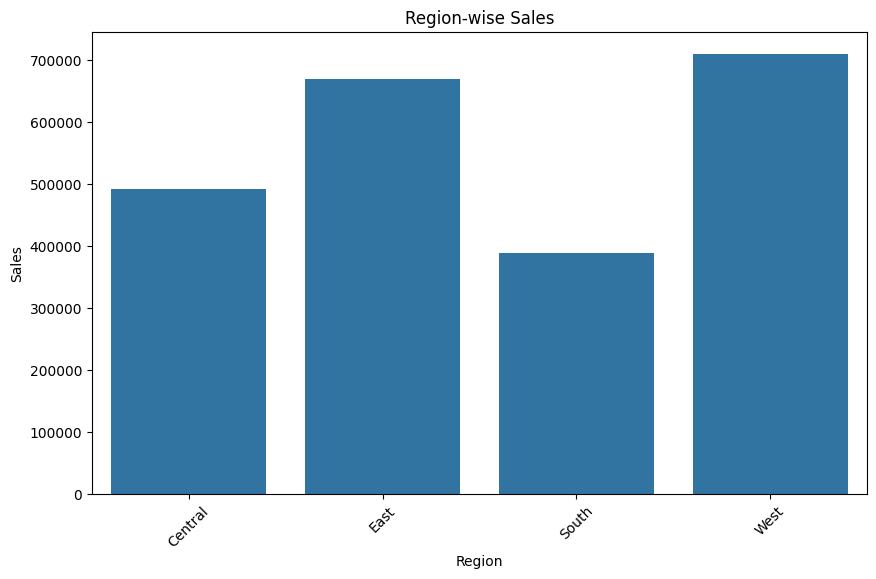

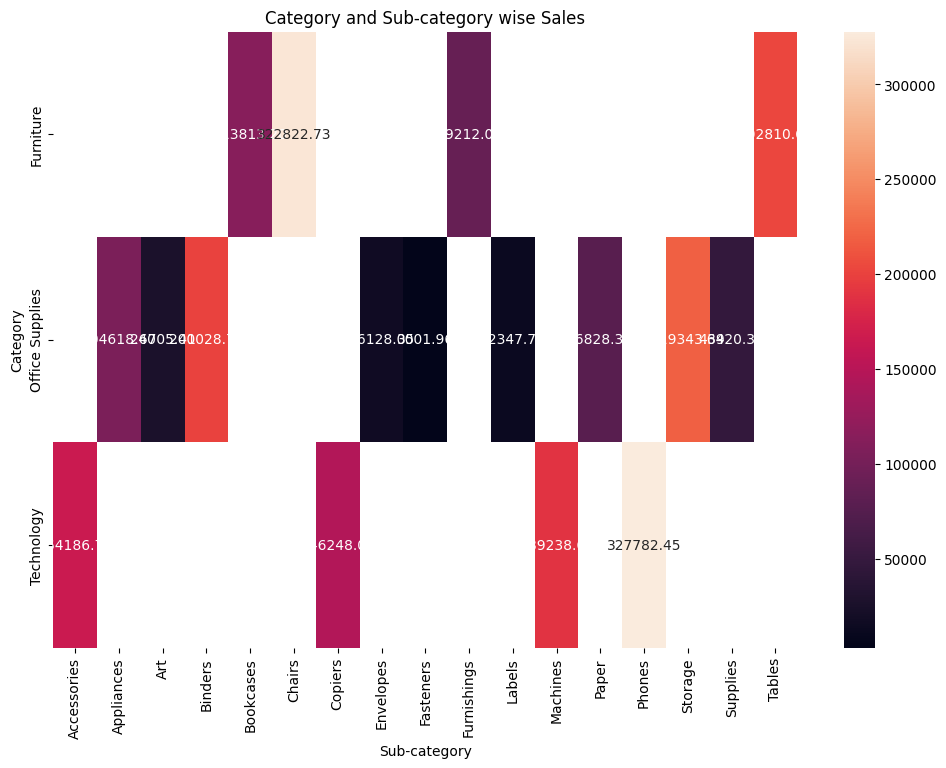

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
superstore_df = pd.read_csv("/content/superstore_final_dataset (1)(1).csv", encoding='latin1')

# Replace the column names
superstore_df.columns = ['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
                         'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
                         'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
                         'Product_Name', 'Sales']

# Extract the year from 'Order_Date'
superstore_df['Order_Year'] = pd.to_datetime(superstore_df['Order_Date']).dt.year


# B.Visualize High-Selling and Low-Selling Products by Product_ID
product_sales = superstore_df.groupby('Product_ID')['Sales'].sum().sort_values(ascending=False)
high_selling_products = product_sales.head(5)
low_selling_products = product_sales.tail(5)

# C.Year wise visualize the sales details
yearly_sales = superstore_df.groupby('Order_Year')['Sales'].sum()

# D.Region wise visualize the sales details
region_sales = superstore_df.groupby('Region')['Sales'].sum()

# E.Category and Sub_category wise visualize the sales
category_sales = superstore_df.groupby(['Category', 'Sub_Category'])['Sales'].sum().unstack()

# 2. Customer Analysis
# A.Visualize customer data year-wise
customer_yearly_data = superstore_df.groupby(['Customer_ID', 'Order_Year'])['Sales'].sum().reset_index()

# B.Visualize regular customers based on their purchases
regular_customers = superstore_df['Customer_ID'].value_counts().reset_index(name='Frequency').rename(columns={'index': 'Customer_ID'})

# C.Visualize customer-wise which is the top-selling product
customer_top_products = superstore_df.groupby(['Customer_ID', 'Product_ID'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# D.Visualize year-wise top-selling product
yearly_top_product = superstore_df.groupby(['Order_Year', 'Product_ID'])['Sales'].sum().reset_index().sort_values(by=['Order_Year', 'Sales'], ascending=[True, False])

# E.Visualize the high-rate customers in the City and state
high_rate_customers = superstore_df.groupby(['City', 'State'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# 3. Sales Analysis
# A.Year-wise sales rate
yearly_sales_rate = superstore_df.groupby('Order_Year')['Sales'].sum()

# B.Top selling year
top_selling_year = yearly_sales_rate.idxmax()

# C.Ship-mode selling details
ship_mode_sales = superstore_df.groupby('Ship_Mode')['Sales'].sum()

# D.Which city sells more products and fewer products?
city_sales = superstore_df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# E. Segment-wise selling details
segment_sales = superstore_df.groupby('Segment')['Sales'].sum()

# Visualizations
# Example visualizations for some of the analyses
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title('Product Sales')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Region-wise Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(category_sales, annot=True, fmt=".2f")
plt.title('Category and Sub-category wise Sales')
plt.xlabel('Sub-category')
plt.ylabel('Category')
plt.show()

